In [20]:
import os
import pandas as pd
import xarray as xr
import numpy as np

import gsw                  
import pop_tools

import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cmocean.cm as cmo

nature_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',linewidth=0.5, edgecolor='black', facecolor='whitesmoke')
ccrs = cartopy.crs

In [3]:
df = pd.read_csv('1_std_events_dens_spg.csv')
grouped = df.groupby('Index')

path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/'
above_names = ['1_std_TEMP_above.nc','1_std_SALT_above.nc','1_std_SIGMA_above.nc']
below_names = ['1_std_TEMP_below.nc','1_std_SALT_below.nc','1_std_SIGMA_below.nc']

# Check if all files have been processed

In [13]:
# Count the occurrences of each value in the 'Condition' column
condition_counts = df['Condition'].value_counts()

# Print the counts
print(condition_counts)

Above    237
Below     60
Name: Condition, dtype: int64


# Check if files have content

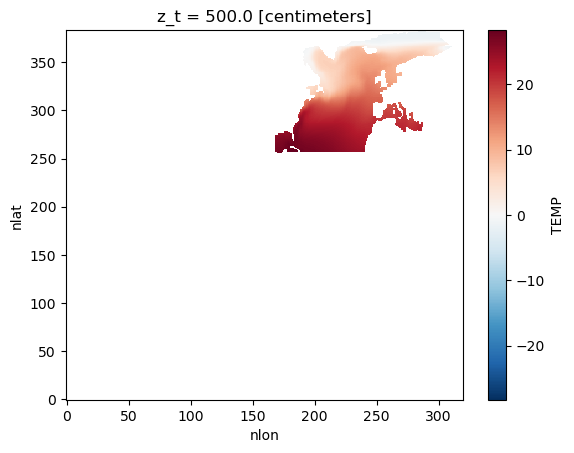

In [14]:
xr.open_dataset(path+above_names[0]).TEMP.isel(time=0, z_t=0).plot()

# Combine all files by taking their average

In [15]:
ds_temp = xr.open_dataset(path+above_names[0])

period1_avg = ds_temp.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_temp.isel(time=slice(45,59)).mean(dim='time')
ds_temp_anom = period2_avg - period1_avg

(250.0, 385.0)

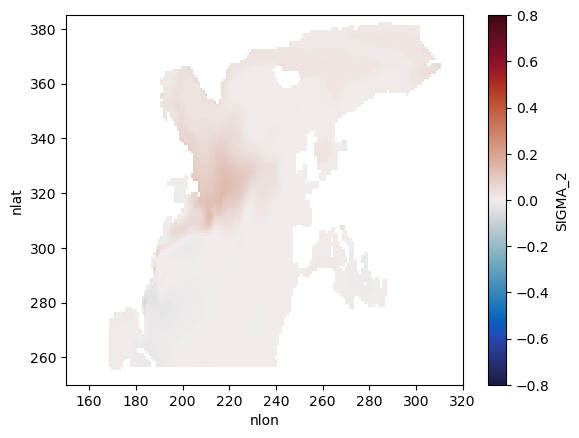

In [16]:
ds_temp_anom.TEMP.sel(z_t=slice(5.0000000e+02, 1.050000e+04)).mean('z_t').plot(vmin = -0.8, vmax = 0.8, cmap=cmo.balance)
plt.xlim(150, 320)
plt.ylim(250, 385)

In [21]:
ds_temp = xr.open_dataset(path+below_names[0])

period1_avg = ds_temp.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_temp.isel(time=slice(45,59)).mean(dim='time')
ds_temp_anom = period2_avg - period1_avg

(250.0, 385.0)

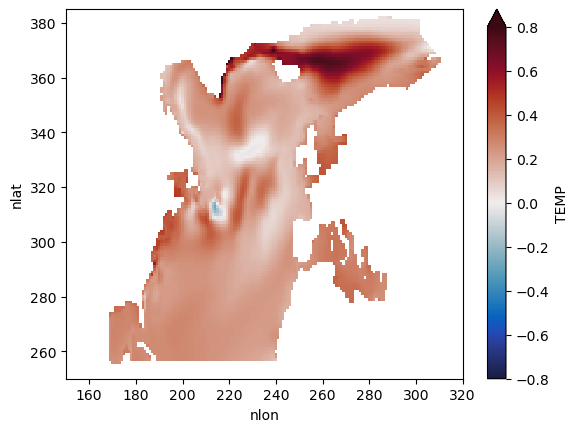

In [22]:
ds_temp_anom.TEMP.sel(z_t=slice(5.0000000e+02, 1.050000e+04)).mean('z_t').plot(vmin = -0.8, vmax = 0.8, cmap=cmo.balance)
plt.xlim(150, 320)
plt.ylim(250, 385)

# Plot increase anomaly

In [49]:
ds_temp = xr.open_dataset(path+above_names[0])
ds_salt = xr.open_dataset(path+above_names[1])

CT = gsw.conversions.CT_from_pt(ds_salt['SALT'], ds_temp['TEMP'])
ds_sigma = gsw.density.sigma2(ds_salt['SALT'], CT)

period1_avg = ds_sigma.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_sigma.isel(time=slice(45,59)).mean(dim='time')
ds_sigma = period2_avg - period1_avg

In [50]:
ds_sigma = ds_sigma.roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_sigma['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLAT']), np.isinf(ds_sigma['TLAT']) | np.ma.getmask(ds_sigma['TLAT'])),
    replacement_value,
    ds_sigma['TLAT']
)

ds_sigma['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLONG']), np.isinf(ds_sigma['TLONG']) | np.ma.getmask(ds_sigma['TLONG'])),
    replacement_value,
    ds_sigma['TLONG']
)

plotting_data = ds_sigma.sel(z_t=slice(5.0000000e+02, 1.050000e+04)).mean('z_t').squeeze()

In [51]:
vmin = -0.15 #abs(ds_sigma.SIGMA_2).max()
vmax = -vmin 

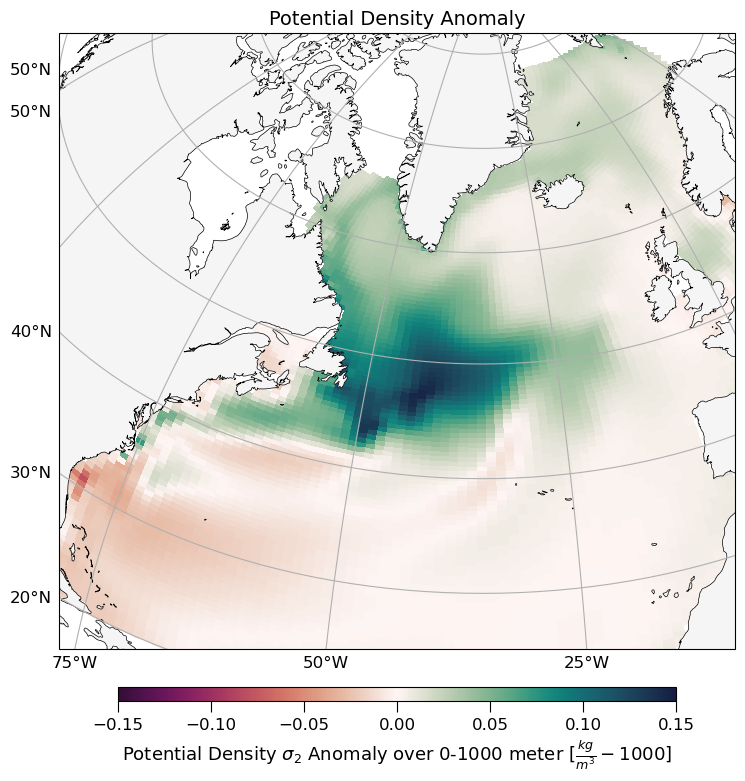

In [52]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Potential Density $\sigma_2$ Anomaly over 0-1000 meter [$\frac{kg}{m^3} -1000$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.curl_r,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('Potential Density Anomaly', fontsize=14)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'sigma_anomaly.png', bbox_inches='tight', dpi=300)

# Plot decrease anomaly

In [53]:
ds_temp = xr.open_dataset(path+below_names[0])
ds_salt = xr.open_dataset(path+below_names[1])

CT = gsw.conversions.CT_from_pt(ds_salt['SALT'], ds_temp['TEMP'])
ds_sigma = gsw.density.sigma2(ds_salt['SALT'], CT)

period1_avg = ds_sigma.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_sigma.isel(time=slice(45,59)).mean(dim='time')
ds_sigma = period2_avg - period1_avg

In [54]:
ds_sigma = ds_sigma.roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_sigma['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLAT']), np.isinf(ds_sigma['TLAT']) | np.ma.getmask(ds_sigma['TLAT'])),
    replacement_value,
    ds_sigma['TLAT']
)

ds_sigma['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLONG']), np.isinf(ds_sigma['TLONG']) | np.ma.getmask(ds_sigma['TLONG'])),
    replacement_value,
    ds_sigma['TLONG']
)

plotting_data = ds_sigma.sel(z_t=slice(5.0000000e+02, 1.050000e+04)).mean('z_t').squeeze()

In [55]:
vmin = -0.2 #abs(ds_sigma.SIGMA_2).max()
vmax = -vmin 

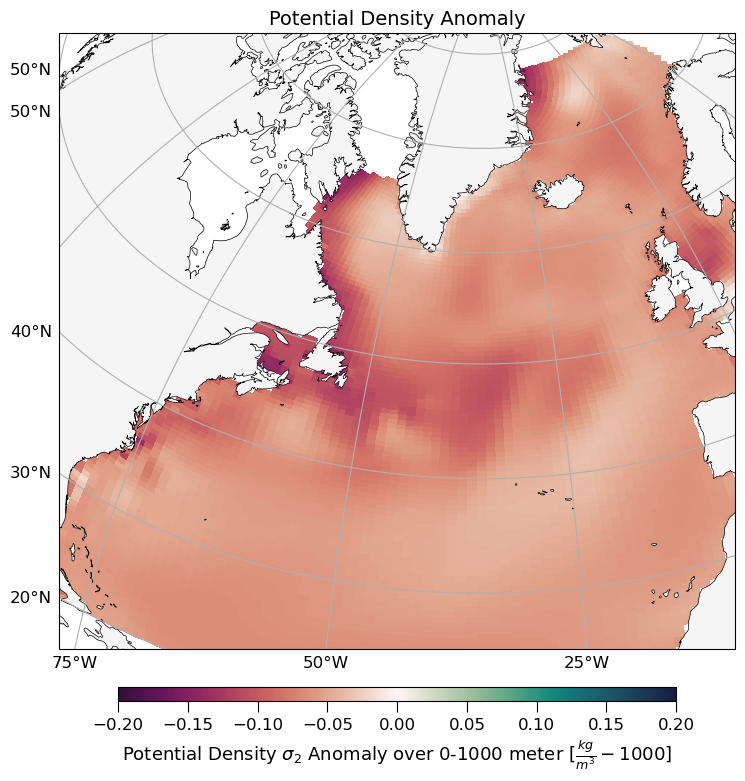

In [56]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Potential Density $\sigma_2$ Anomaly over 0-1000 meter [$\frac{kg}{m^3} -1000$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.curl_r,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('Potential Density Anomaly', fontsize=14)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'sigma_anomaly.png', bbox_inches='tight', dpi=300)